# IND and ROD

## Definition

A work[1] used two indicators: IND and ROD. Both indicators are involved in the determination of the chemical rank for the target data matrices. IND and ROD are named after indicator and ratio-of-derivatives, respectively. The definitions of the indicators are shown in the following equations:

$
\sum_{i=1}^N \sum_{a=L+1}^A e_{i,a}^2 =  \sum_{i=1}^N \sum_{j=1}^M d_{i,j}^2 -  \sum_{i=1}^N \sum_{a=1}^L t_{i,a}^2  ,
\\
IND(L) = \frac{ \sqrt{ \sum_{i=1}^N\sum_{a=L+1}^A e_{i,a}^2  }}{ (N-L)^2 } ,
\\
ROD(L) = \frac{IND(L-2) - IND(L-1)}{IND(L-1) - IND(L)} \quad (L\geq3),
\\
ROD(L) = 0 \quad (L=1, 2),
$

where $e_{i,a}$, $d_{i,j}$, and $t_{i,a}$ denote PCA projection error, original spectral intensity, and PCA score respectively. $i$, $j$, and $a$ denote the index of sample, the index of wavelength, and the index of PCA score. $L$ denotes the number of components.

(Note that the variance of the whole matrix after centering is equal to that of the whole PCA score matrix. Moreover, the reference shows the wrong equation. Based on the meanings of both variance of spectra matrix and variance of PCA scores, the equations above must be the correct one. )

On another note, $IND(L-1) \geq IND(L)$ is generally true because the remaining error IND(L) decrease monotonously along with $L$. Thus, ROD(L) basically takes non-negative value.

Another old work has introduced various indicators including IND. The equations that appear in the first refernce have some mistakes; therefore, you may look into the second reference to see the accurate definition

## Usage

After computing IND or ROD, one can take the number of components that achieves either the minimum value of IND or the maximum value of ROD.

[1] D. Tefera; et al. $\it{Ind. Eng. Chem. Res.}$ 2017 vol: 56 pp: 10756-10769
[2] A. Elbergali; et al. ${\it Anal. Chim. Acta}$ 1999 vol: 379(1-2) pp: 143-158

In [1]:
import sys
sys.path.append('../')

from pymcr import rank
from scipy import io
import numpy as np

import requests
import matplotlib
matplotlib.rcParams['font.size'] = 24.0
import matplotlib.pyplot as plt
from warnings import filterwarnings# because Xmix has dtype('>f8')
filterwarnings('ignore')
%matplotlib inline

In [2]:
url = 'http://www.eigenvector.com/data/tablets/nir_shootout_2002.mat'
# Thanks to https://stackoverflow.com/questions/16694907/how-to-download-large-file-in-python-with-requests-py
local_filename = 'nir_shootout_2002.mat'
r = requests.get(url, stream=True)
with open(local_filename, 'wb') as f:
    for chunk in r.iter_content(chunk_size=1024): 
        if chunk: # filter out keep-alive new chunks
            f.write(chunk)
mat = io.loadmat('nir_shootout_2002.mat' )

In [3]:
for x in mat['calibrate_1'][0][0]:
    if len(x) > 1:
        if np.sum(x[0].shape)>2:
            print(x.dtype)
            Xmix = x
        elif np.sum(x[0][0].shape) > 0:
            index_samples = x[0][0]

>f8


In [4]:
# Computation
IND = rank.ind(Xmix)
ROD = rank.rod(Xmix)

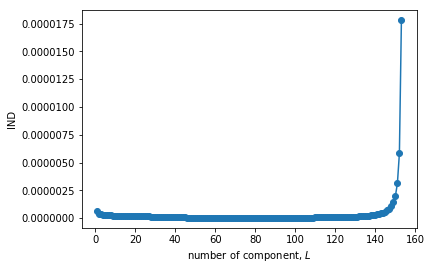

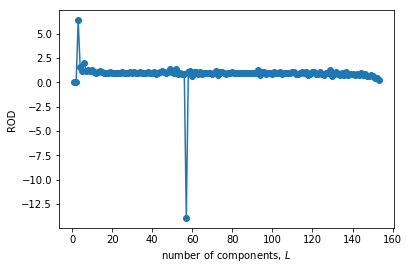

In [5]:
# Visualization
plt.plot(np.arange(1, len(IND)+1), IND,'o-')
plt.xlabel('number of component, $L$')
plt.ylabel('IND')
plt.show()

plt.plot(np.arange(1, len(ROD)+1), ROD,'o-')
plt.xlabel('number of components, $L$')
plt.ylabel('ROD')
plt.show()

In [6]:
# ROD(L) when L=3
print( (IND[0] - IND[1])/(IND[1] - IND[2]) )
print( ROD[2] )

6.373826928554154
6.373845144610116


In [7]:
print('{} components are hidden in the `Xmix`'.format(np.argmax(ROD)+1))
print('{} components are hidden in the `Xmix`'.format(np.argmin(IND)+1))

3 components are hidden in the `Xmix`
56 components are hidden in the `Xmix`
